<a href="https://colab.research.google.com/github/nadunchanna98/MultiOmics-CervicalCancer-MachineLearning-DataProcessing/blob/main/PCA_methylation450K_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.decomposition import PCA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
df = pd.read_csv('/content/drive/MyDrive/RESEACH/TCGA Cervical Cancer (CESC)/methilation450K-Preprocessed-data/filtered_dataset.csv')

In [4]:
df.shape

(312, 202)

In [5]:
df1 = df[df['histological_type'] != 'Adenosquamous']

In [6]:
df1.shape

(305, 202)

In [7]:
df2 = df1.copy()

In [8]:
mapping = {
    "Endocervical type of adenocarcinoma": "adeno",
    "Endocervical Adenocarcinoma of the Usual Type": "adeno",
    "Endocervical Type of Adenocarcinoma": "adeno",
    "Endometrioid Adenocarcinoma of Endocervix": "adeno",
    "Mucinous Adenocarcinoma of Endocervical Type": "adeno"
}


df2["histological_type"] = df2["histological_type"].replace(mapping)



In [9]:
df2["histological_type"].unique()

array(['adeno', 'Cervical Squamous Cell Carcinoma'], dtype=object)

# Upsampling and Downsampling

In [10]:
from sklearn.utils import resample

In [11]:
# Separate the "Cervical Squamous Cell Carcinoma" class
cervical_squamous_df = df2[df2['histological_type'] == "Cervical Squamous Cell Carcinoma"]


In [12]:
# Perform downsampling if there are more than 75 samples
if len(cervical_squamous_df) > 75:
    cervical_squamous_df = resample(cervical_squamous_df, n_samples=75, random_state=42)


In [13]:
# Create a DataFrame for the "adeno" class
adeno_df = df2[df2['histological_type'] == "adeno"]

# Upsample the "adeno" class to 75 samples
while len(adeno_df) < 75:
    adeno_df = pd.concat([adeno_df, adeno_df.sample(n=min(75 - len(adeno_df), len(adeno_df)), replace=True)])


In [14]:
# Combine the downsampled "Cervical Squamous Cell Carcinoma" and upsampled "adeno" DataFrames
df2_Resampled = pd.concat([cervical_squamous_df, adeno_df])

In [15]:
df2_Resampled.shape

(150, 202)

#PCA for RESAMPLING DATA fith 200 features

In [16]:
selected_features_resampled = df2_Resampled.iloc[:, 2:202]
selected_features_resampled

,cg26961332,cg01847620,cg01814098,cg17812026,cg25800170,cg13682477,cg23889391,cg26082557,cg14239811,cg25087487,...,cg08643007,cg08367083,cg00810836,cg04087237,cg25379026,cg08839858,cg15794252,cg09806118,cg04020999,cg06960784
118,0.9837,0.9861,0.5218,0.9785,0.4325,0.5275,0.5703,0.1668,0.0094,0.0667,...,0.0314,0.0242,0.0178,0.2605,0.4319,0.5527,0.0146,0.5959,0.9861,0.2167
124,0.9910,0.9884,0.0202,0.9882,0.0180,0.0199,0.0155,0.0183,0.0113,0.0147,...,0.0641,0.0278,0.0279,0.0175,0.0161,0.0276,0.0143,0.0380,0.9829,0.0225
85,0.8326,0.7987,0.0328,0.6349,0.0162,0.0252,0.0152,0.0156,0.0138,0.0270,...,0.0226,0.0208,0.0284,0.0183,0.1321,0.0224,0.0137,0.0146,0.9734,0.0261
223,0.9626,0.9824,0.1640,0.8771,0.0163,0.0237,0.0193,0.2199,0.0122,0.1375,...,0.0370,0.0215,0.0293,0.0143,0.0180,0.0209,0.0144,0.0133,0.9803,0.0222
26,0.9898,0.9820,0.2013,0.9901,0.0226,0.0580,0.0146,0.0131,0.0744,0.0189,...,0.0188,0.0670,0.0729,0.0246,0.0766,0.2659,0.0133,0.0117,0.9856,0.0663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0.7864,0.9785,0.0211,0.9774,0.1363,0.0199,0.0127,0.0128,0.0114,0.2965,...,0.0250,0.1936,0.0422,0.0150,0.0171,0.2940,0.0142,0.0124,0.9751,0.0191
123,0.9888,0.9863,0.0222,0.9861,0.0196,0.0322,0.0176,0.0178,0.0191,0.0120,...,0.0263,0.0348,0.0256,0.0125,0.0185,0.0226,0.0182,0.0146,0.9840,0.0235
256,0.9904,0.9847,0.0207,0.9857,0.0203,0.0221,0.0163,0.0137,0.4167,0.0140,...,0.0288,0.0250,0.0197,0.0113,0.3396,0.0637,0.0139,0.0129,0.9805,0.0198
293,0.9875,0.9850,0.0209,0.9871,0.0182,0.0205,0.0143,0.0178,0.0110,0.0150,...,0.0241,0.0215,0.0198,0.0116,0.0167,0.0252,0.0141,0.0175,0.9792,0.0204


In [17]:
df2_Resampled2 = df2_Resampled.copy()
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df2_Resampled['histological_type_encoded'] = label_encoder.fit_transform(df2_Resampled['histological_type'])

In [18]:
unique_encoded_values = df2_Resampled['histological_type_encoded'].unique()
print(unique_encoded_values)

[0 1]


In [19]:
print(df2_Resampled[['histological_type', 'histological_type_encoded']].sample(10))


                    histological_type  histological_type_encoded
115  Cervical Squamous Cell Carcinoma                          0
232                             adeno                          1
294                             adeno                          1
122                             adeno                          1
167                             adeno                          1
53                              adeno                          1
305  Cervical Squamous Cell Carcinoma                          0
196                             adeno                          1
311                             adeno                          1
53                              adeno                          1


In [20]:
pca = PCA(n_components=3)

In [21]:
pca.fit(selected_features_resampled)
pca_set = pca.transform(selected_features_resampled)

In [22]:
PC1 = pca_set[:,0]
PC2 = pca_set[:,1]
PC3 = pca_set[:,2]

In [23]:
target = df2_Resampled['histological_type_encoded']
label = target.unique()

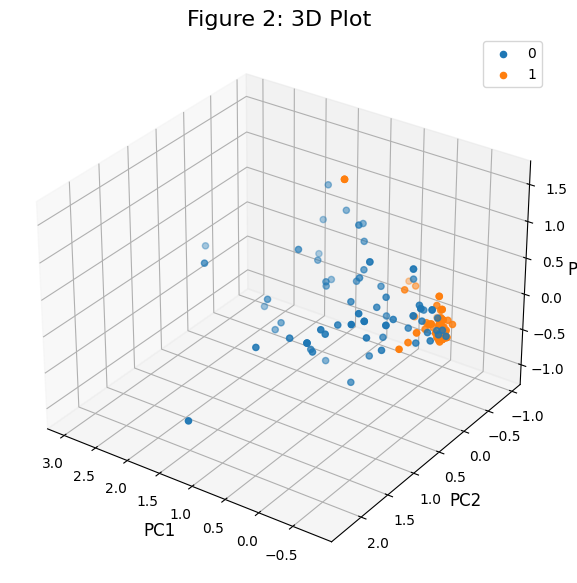

In [24]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')

for l in np.unique(target):
 ix=np.where(target==l)
 ax.scatter(PC1[ix],
            PC2[ix],
            PC3[ix],
           label=label[l])

ax.set_xlabel("PC1",
              fontsize=12)
ax.set_ylabel("PC2",
              fontsize=12)
ax.set_zlabel("PC3",
              fontsize=12)

ax.view_init(30, 125)
ax.legend()
plt.title("Figure 2: 3D Plot",
          fontsize=16)
plt.show()

#downsample into 75 and 200 features

In [25]:
selected_features_resampled = df2_Resampled.iloc[:, 2:52]

In [26]:
pca.fit(selected_features_resampled)
pca_set = pca.transform(selected_features_resampled)

PC1 = pca_set[:,0]
PC2 = pca_set[:,1]
PC3 = pca_set[:,2]

df2_Resampled1 = df2_Resampled.copy()

label_encoder = LabelEncoder()
df2_Resampled1['histological_type_encoded'] = label_encoder.fit_transform(df2_Resampled1['histological_type'])


target = df2_Resampled1['histological_type_encoded']
label = target.unique()


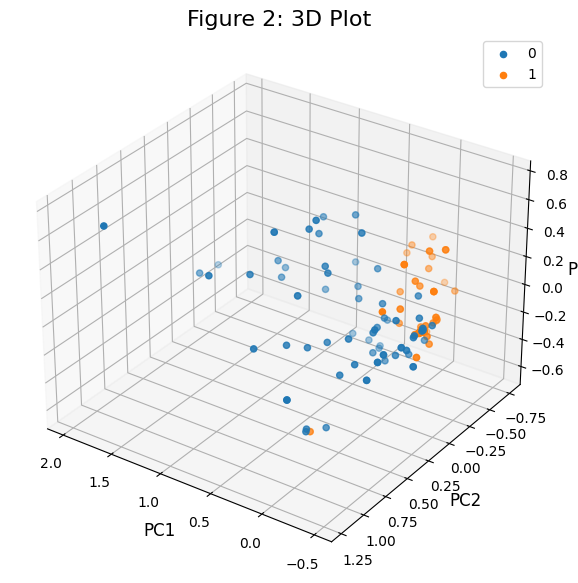

In [27]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')

for l in np.unique(target):
 ix=np.where(target==l)
 ax.scatter(PC1[ix],
            PC2[ix],
            PC3[ix],
           label=label[l])

ax.set_xlabel("PC1",
              fontsize=12)
ax.set_ylabel("PC2",
              fontsize=12)
ax.set_zlabel("PC3",
              fontsize=12)

ax.view_init(30, 125)
ax.legend()
plt.title("Figure 2: 3D Plot",
          fontsize=16)
plt.show()

#only downsample to 48 AND 200 FEATURES

In [28]:
# Separate the "Cervical Squamous Cell Carcinoma" class
cervical_squamous_df2 = df2[df2['histological_type'] == "Cervical Squamous Cell Carcinoma"]

if len(cervical_squamous_df2) > 48:
    cervical_squamous_df2 = resample(cervical_squamous_df2, n_samples=48, random_state=42)

In [29]:
adeno_df = df2[df2['histological_type'] == "adeno"]

In [30]:
df2_Resampled2 = pd.concat([cervical_squamous_df2, adeno_df])

In [31]:
df2_Resampled2.shape

(96, 202)

In [32]:
selected_features_resampled2 = df2_Resampled2.iloc[:, 2:202]

In [33]:
pca.fit(selected_features_resampled2)
pca_set2 = pca.transform(selected_features_resampled2)

PC1 = pca_set2[:,0]
PC2 = pca_set2[:,1]
PC3 = pca_set2[:,2]

df2_Resampled3 = df2_Resampled2.copy()

label_encoder = LabelEncoder()
df2_Resampled3['histological_type_encoded'] = label_encoder.fit_transform(df2_Resampled3['histological_type'])


target = df2_Resampled3['histological_type_encoded']
label = target.unique()


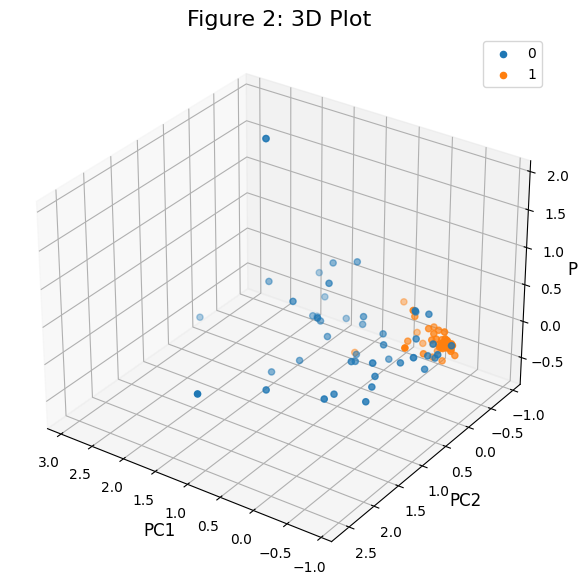

In [34]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')

for l in np.unique(target):
 ix=np.where(target==l)
 ax.scatter(PC1[ix],
            PC2[ix],
            PC3[ix],
           label=label[l])

ax.set_xlabel("PC1",
              fontsize=12)
ax.set_ylabel("PC2",
              fontsize=12)
ax.set_zlabel("PC3",
              fontsize=12)

ax.view_init(30, 125)
ax.legend()
plt.title("Figure 2: 3D Plot",
          fontsize=16)
plt.show()

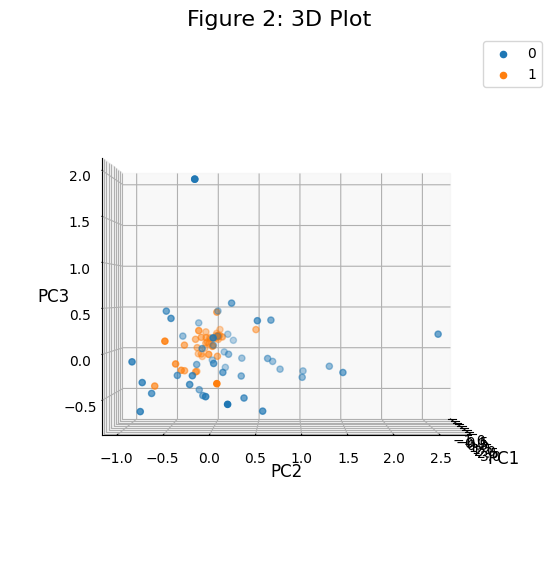

In [35]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')

for l in np.unique(target):
 ix=np.where(target==l)
 ax.scatter(PC1[ix],
            PC2[ix],
            PC3[ix],
           label=label[l])

ax.set_xlabel("PC1",
              fontsize=12)
ax.set_ylabel("PC2",
              fontsize=12)
ax.set_zlabel("PC3",
              fontsize=12)

ax.view_init(0, 0)  # Rotate 0 degrees counterclockwise around z-axis and tilt 0 degrees
ax.legend()
plt.title("Figure 2: 3D Plot",
          fontsize=16)
plt.show()

#48 Features and 50 samples

In [36]:
selected_features_resampled3 = df2_Resampled2.iloc[:, 2:52]

In [37]:
pca.fit(selected_features_resampled3)
pca_set3 = pca.transform(selected_features_resampled3)

PC1 = pca_set3[:,0]
PC2 = pca_set3[:,1]
PC3 = pca_set3[:,2]

df2_Resampled4 = df2_Resampled2.copy()

label_encoder = LabelEncoder()
df2_Resampled4['histological_type_encoded'] = label_encoder.fit_transform(df2_Resampled4['histological_type'])


target = df2_Resampled4['histological_type_encoded']
label = target.unique()

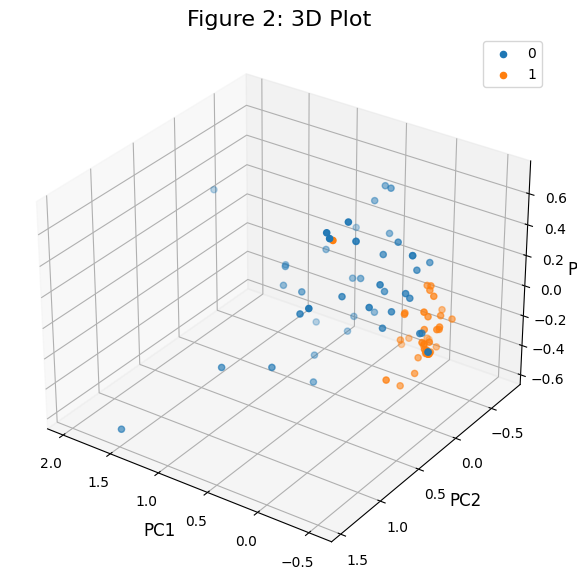

In [38]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')

for l in np.unique(target):
 ix=np.where(target==l)
 ax.scatter(PC1[ix],
            PC2[ix],
            PC3[ix],
           label=label[l])

ax.set_xlabel("PC1",
              fontsize=12)
ax.set_ylabel("PC2",
              fontsize=12)
ax.set_zlabel("PC3",
              fontsize=12)

ax.view_init(30, 125)
ax.legend()
plt.title("Figure 2: 3D Plot",
          fontsize=16)
plt.show()

In [51]:
df2_Resampled2

,id,histological_type,cg26961332,cg01847620,cg01814098,cg17812026,cg25800170,cg13682477,cg23889391,cg26082557,...,cg08643007,cg08367083,cg00810836,cg04087237,cg25379026,cg08839858,cg15794252,cg09806118,cg04020999,cg06960784
118,TCGA-EK-A2RA-01,Cervical Squamous Cell Carcinoma,0.9837,0.9861,0.5218,0.9785,0.4325,0.5275,0.5703,0.1668,...,0.0314,0.0242,0.0178,0.2605,0.4319,0.5527,0.0146,0.5959,0.9861,0.2167
124,TCGA-EK-A2RJ-01,Cervical Squamous Cell Carcinoma,0.9910,0.9884,0.0202,0.9882,0.0180,0.0199,0.0155,0.0183,...,0.0641,0.0278,0.0279,0.0175,0.0161,0.0276,0.0143,0.0380,0.9829,0.0225
85,TCGA-EA-A44S-01,Cervical Squamous Cell Carcinoma,0.8326,0.7987,0.0328,0.6349,0.0162,0.0252,0.0152,0.0156,...,0.0226,0.0208,0.0284,0.0183,0.1321,0.0224,0.0137,0.0146,0.9734,0.0261
223,TCGA-ZX-AA5X-01,Cervical Squamous Cell Carcinoma,0.9626,0.9824,0.1640,0.8771,0.0163,0.0237,0.0193,0.2199,...,0.0370,0.0215,0.0293,0.0143,0.0180,0.0209,0.0144,0.0133,0.9803,0.0222
26,TCGA-MY-A5BE-01,Cervical Squamous Cell Carcinoma,0.9898,0.9820,0.2013,0.9901,0.0226,0.0580,0.0146,0.0131,...,0.0188,0.0670,0.0729,0.0246,0.0766,0.2659,0.0133,0.0117,0.9856,0.0663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,TCGA-VS-A9V1-01,adeno,0.9891,0.9866,0.0169,0.9869,0.0192,0.0188,0.0158,0.0158,...,0.0338,0.0200,0.0439,0.0123,0.0184,0.0158,0.0140,0.0142,0.9808,0.0186
276,TCGA-UC-A7PI-01,adeno,0.9919,0.9876,0.0181,0.9873,0.0137,0.0140,0.0117,0.0119,...,0.0228,0.0198,0.0203,0.0132,0.0137,0.0158,0.0109,0.0132,0.9842,0.0162
293,TCGA-VS-A9V4-01,adeno,0.9875,0.9850,0.0209,0.9871,0.0182,0.0205,0.0143,0.0178,...,0.0241,0.0215,0.0198,0.0116,0.0167,0.0252,0.0141,0.0175,0.9792,0.0204
294,TCGA-FU-A40J-01,adeno,0.9916,0.9884,0.0192,0.4436,0.0136,0.0167,0.0134,0.0129,...,0.0262,0.0208,0.0297,0.4727,0.0142,0.0172,0.4836,0.0111,0.9810,0.3358


In [48]:
# Define the file path in Google Drive
file_path = '/content/drive/MyDrive/RESEACH/TCGA Cervical Cancer (CESC)/methilation450K-Preprocessed-data/features_200_samples_96_methilation450K.csv'

# Write DataFrame to CSV file
df2_Resampled2.to_csv(file_path)

In [50]:
# Define the file path in Google Drive
file_path = '/content/drive/MyDrive/RESEACH/TCGA Cervical Cancer (CESC)/methilation450K-Preprocessed-data/features_200_samples_150_methilation450K.csv'

# Write DataFrame to CSV file
df2_Resampled.to_csv(file_path)